<a href="https://colab.research.google.com/github/ThaerAlkassab/fraud_detection_gnn/blob/main/NN%2BGNN%2BSMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fraud Detection Using GNNs
## What is fraud detection ?
Fraud detection is the process of identifying and preventing unauthorized activity in organizations. It has become a major challenge for companies in industries such as banking, finance, retail, and e-commerce. Fraud can negatively impact an organization's financial performance and reputation, making it crucial for companies to prevent and predict suspicious activity.

## Complex and evolving fraud patterns
Fraudsters continually revise their strategies and devise ever-more-sophisticated methods to cheat the system, regularly involving intricate networks of transactions to prevent recognition. Traditional rule-based systems and matrix-based ML such as SVMs and XGBoost often just ponder the immediate edges of a deal (who transferred money to whom), usually omitting to notice fraudulent patterns with more complicated context. Rule-based systems furthermore need to be manually adjusted as fraud patterns shift and new scams arise.


## Label Quality
The datasets for fraud detection are commonly unbalanced and incompletely labeled. In reality, only a tiny fraction of people plan to perpetrate fraud. Usually, domain specialists will label transactions as fraudulent or not, but they can't make certain that all fraud has been identified in the dataset.

The large disparity between the number of labels and the amount of data available renders it hard to generate supervised models. Models trained on the accessible classifications could have a greater number of false negatives, while the imbalanced dataset could lead to an increase in false positives. Consequently, training Graph Neural Networks (GNNs) with different objectives and making use of their latent representations afterwards can be advantageous.



## Model explainability
Predicting if a transaction is fraudulent or not is inadequate for meeting the transparency standards of the banking sector. It is also essential to comprehend why certain deals are marked as deceitful. This explicability is critical for comprehending how fraud occurs, how to execute procedures to reduce fraud, and to make sure the process isn’t prejudiced. As a result, fraud detection models must be comprehensible and interpretable, which restricts the choices of models that investigators can apply.

## Graph approaches for fraud detection
Transactions can be represented as a graph, with users as nodes and interactions between them as edges. Traditional feature-based algorithms such as XGBoost and DLRM analyze individual nodes or edges, while graph-based approaches take into account the local context and structure of the graph, including neighboring nodes and edges.

In the traditional graph domain, there are various methods for making predictions based on graph structure, such as statistical approaches that aggregate features from adjacent nodes or edges. Algorithms like the Louvain method and InfoMap can identify communities and clusters of users on the graph. However, these methods lack the expressivity to fully consider the graph in its original format.

Graph neural networks (GNNs) offer a solution by representing local structural and feature context natively within the model. Through aggregation and message passing, information from both edges and nodes is propagated to neighboring nodes. Multiple layers of graph convolution result in a node's state containing information from nodes multiple layers away, effectively allowing the GNN to have a "receptive field" of nodes or edges multiple jumps away from the node or edge in question.

For fraud detection, GNNs can account for complex or longer chains of transactions that fraudsters use for obfuscation. Additionally, changing patterns can be addressed by retraining the model iteratively.

## ML for graph
These are the general steps of ML on Graph, depending on the task, the methods used in each step may change and not all the steps may be needed.

1- Graph Representation: The first step in applying machine learning techniques to graphs is to represent the graph in a format that can be input into a machine learning model. This can be done using various graph representations such as adjacency matrices, adjacency lists, and edge lists.

2- Feature Extraction: Once the graph is represented, the next step is to extract features from the graph that can be used as input to a machine learning model. These features can include things like node degree, centrality measures, and graph traversal patterns.

3- Dimensionality Reduction: As the number of nodes and edges in a graph can be large, it is often necessary to reduce the dimensionality of the graph representation before applying machine learning techniques. This can be done using techniques like principal component analysis (PCA) and t-SNE.

4- Model Selection: After the graph is represented and features have been extracted, the next step is to select a machine learning model that can be applied to the graph data. Common models used for graph data include decision trees, random forests, and neural networks.

5- Training and Evaluation: Once the model is selected, it is trained on the graph data using a labeled training dataset. The model is then evaluated on a separate test dataset to assess its performance.

6- Predictions: After the model is trained, it can be used to make predictions on new graph data. For example, it can be used to predict the likelihood of a node in a graph being in a certain class or to predict the likelihood of a link between two nodes.

## Dataset
The IBM credit card transaction dataset is a publicly available dataset that contains information about credit card transactions. It is often used for research and testing of fraud detection models. The dataset includes a variety of features such as the amount of the transaction, the type of card used, and the location of the transaction. It also includes a label indicating whether or not the transaction was fraudulent. The dataset is designed to be representative of real-world transactions and therefore contains a certain level of class imbalance, with a higher number of non-fraudulent transactions than fraudulent transactions. The dataset is provided by IBM and the data is simulated, but it is not specified the exact process of data simulation. It is important to note that the data is not real and it is not linked to any real customer or financial institution.

The data set contains:

* 24 million unique transactions
* 6,000 unique merchants
* 100,000 unique cards
* 30,000 fraudulent samples (0.1% of total transactions)

Where to find the data

In our case we will use Kaggle to create our GNN model so we are using the dataset on kaggle, here's the link[https://www.kaggle.com/datasets/ealtman2019/credit-card-transactions]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import os
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/XAI_GNN_Thesis/data/card_transaction.v1.csv')

In [ ]:
df = df.sample(frac=1, random_state=42)  # Shuffle the data

In [ ]:
subset_size = int(0.1 * len(df))  # 20% of data

In [ ]:
# Creating a new subset from the shuffled data
subset_df = df.iloc[:subset_size]

In [ ]:
subset_df.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
18199893,1470,0,2019,7,10,00:11,$59.18,Chip Transaction,-6853385250336487907,Harwood,MD,20776.0,5813,NaN,No
9731325,822,1,2019,1,14,22:12,$280.91,Online Transaction,4241336128694185533,ONLINE,NaN,NaN,4814,NaN,No
536687,41,3,2010,3,15,07:07,$-144.00,Swipe Transaction,190253443608377572,Hemet,CA,92543.0,3359,NaN,No
13223840,1084,0,2015,9,20,14:58,$6.76,Chip Transaction,-7837310524365334241,Littleton,CO,80122.0,5300,NaN,No
17070521,1384,0,2014,10,12,11:44,$9.17,Swipe Transaction,-5023497618971072366,Gardner,KS,66030.0,5812,NaN,No


In [ ]:
subset_df.dtypes

,0
User,int64
Card,int64
Year,int64
Month,int64
Day,int64
Time,object
Amount,object
Use Chip,object
Merchant Name,int64
Merchant City,object


In [ ]:
# Split the "Time" column into hours and minutes
subset_df[['Hours', 'Minutes']] = subset_df['Time'].str.split(':', expand=True)

# Convert hours and minutes to numerical values
subset_df['Hours'] = pd.to_numeric(subset_df['Hours'])
subset_df['Minutes'] = pd.to_numeric(subset_df['Minutes'])

# Drop the original "Time" column
subset_df = subset_df.drop(columns=['Time'])

<ipython-input-9-734556bda71f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df[['Hours', 'Minutes']] = subset_df['Time'].str.split(':', expand=True)
<ipython-input-9-734556bda71f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df[['Hours', 'Minutes']] = subset_df['Time'].str.split(':', expand=True)
<ipython-input-9-734556bda71f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [ ]:
subset_df.isnull().sum()

,0
User,0
Card,0
Year,0
Month,0
Day,0
Amount,0
Use Chip,0
Merchant Name,0
Merchant City,0
Merchant State,271549


In [ ]:
# Fill missing values
subset_df['Merchant State'].fillna('No State', inplace=True)
subset_df['Zip'].fillna(0, inplace=True)
subset_df['Errors?'].fillna('No Error', inplace=True)

<ipython-input-11-189722c185b9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  subset_df['Merchant State'].fillna('No State', inplace=True)
<ipython-input-11-189722c185b9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

The two columns Zip and Merchant state can be extracted from the column Merchant City so we will drop them.

In [ ]:
subset_df = subset_df.drop(columns=["Merchant State","Zip"],axis=1)

In [ ]:
# Replacing values in the "Is Fraud?" column
subset_df['Is Fraud?'] = subset_df['Is Fraud?'].map({'No': 0, 'Yes': 1})

In [ ]:
# Removing dollar symbol and converting "Amount" to float
subset_df['Amount'] = subset_df['Amount'].str.replace('$', '').astype(float)

In [ ]:
subset_df.head()

,User,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,MCC,Errors?,Is Fraud?,Hours,Minutes
18199893,1470,0,2019,7,10,59.18,Chip Transaction,-6853385250336487907,Harwood,5813,No Error,0,0,11
9731325,822,1,2019,1,14,280.91,Online Transaction,4241336128694185533,ONLINE,4814,No Error,0,22,12
536687,41,3,2010,3,15,-144.00,Swipe Transaction,190253443608377572,Hemet,3359,No Error,0,7,7
13223840,1084,0,2015,9,20,6.76,Chip Transaction,-7837310524365334241,Littleton,5300,No Error,0,14,58
17070521,1384,0,2014,10,12,9.17,Swipe Transaction,-5023497618971072366,Gardner,5812,No Error,0,11,44


In [ ]:
subset_df["Errors?"].unique()

array(['No Error', 'Bad PIN,', 'Insufficient Balance,',
       'Technical Glitch,', 'Bad Card Number,', 'Bad CVV,',
       'Bad Expiration,', 'Bad Zipcode,',
       'Insufficient Balance,Technical Glitch,',
       'Bad Card Number,Bad CVV,', 'Bad CVV,Insufficient Balance,',
       'Bad Card Number,Insufficient Balance,',
       'Bad PIN,Technical Glitch,', 'Bad PIN,Insufficient Balance,',
       'Bad Card Number,Bad Expiration,', 'Bad Expiration,Bad CVV,',
       'Bad Expiration,Insufficient Balance,',
       'Bad Zipcode,Insufficient Balance,', 'Bad CVV,Technical Glitch,',
       'Bad Expiration,Technical Glitch,',
       'Bad Card Number,Technical Glitch,'], dtype=object)

In [ ]:
subset_df["Use Chip"].unique()

array(['Chip Transaction', 'Online Transaction', 'Swipe Transaction'],
      dtype=object)

In [ ]:
subset_df["Merchant City"].unique()

array(['Harwood', ' ONLINE', 'Hemet', ..., 'Sacred Heart', 'Lyndell',
       'Steward'], dtype=object)

In [ ]:
# Label encoding is a method of converting categorical variables into numerical variables
subset_df["Merchant City"]=LabelEncoder().fit_transform(subset_df["Merchant City"])
subset_df["Use Chip"]=LabelEncoder().fit_transform(subset_df["Use Chip"])
subset_df["Errors?"]=LabelEncoder().fit_transform(subset_df["Errors?"])

In [ ]:
subset_df["Errors?"].unique()

array([19, 12, 17, 20,  3,  0,  8, 15, 18,  4,  1,  6, 14, 13,  5,  9, 10,
       16,  2, 11,  7])

In [ ]:
subset_df["Use Chip"].unique()

array([0, 1, 2])

In [ ]:
subset_df["Merchant City"].unique()

array([4165,    0, 4256, ..., 8615, 5738, 9495])

In [ ]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2438690 entries, 18199893 to 23041253
Data columns (total 14 columns):
 #   Column         Dtype  
---  ------         -----  
 0   User           int64  
 1   Card           int64  
 2   Year           int64  
 3   Month          int64  
 4   Day            int64  
 5   Amount         float64
 6   Use Chip       int64  
 7   Merchant Name  int64  
 8   Merchant City  int64  
 9   MCC            int64  
 10  Errors?        int64  
 11  Is Fraud?      int64  
 12  Hours          int64  
 13  Minutes        int64  
dtypes: float64(1), int64(13)
memory usage: 279.1 MB


In order to start implementation of model we are going to visualize the data to understand different trends like channel of transactions ( online, swipe or chip and pin), amount of transactions, usage of card for transactions over the year and correlation matrix.

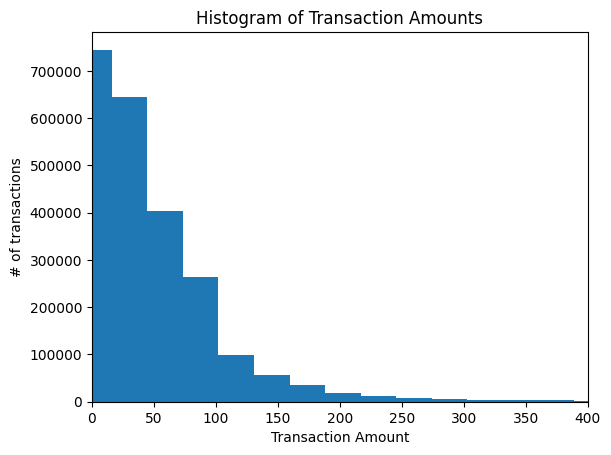

In [ ]:
#Histogram of transactions
plt.hist(subset_df['Amount'], bins=200)
plt.xlabel('Transaction Amount')
plt.xlim(0, 400)  # set the lower and upper bounds of the x-axis
plt.ylabel('# of transactions')
plt.title('Histogram of Transaction Amounts')
plt.show()

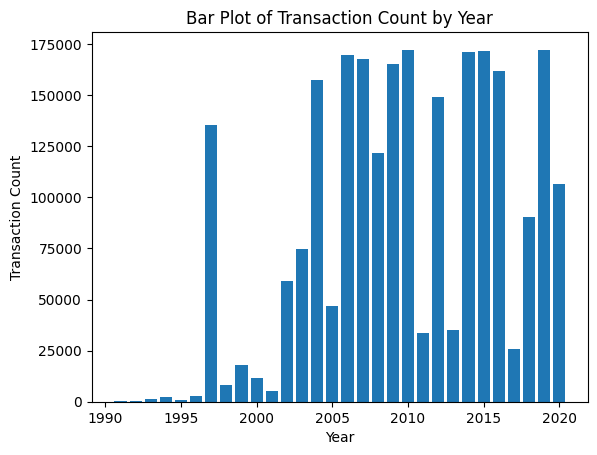

In [ ]:
#transaction count per year
plt.bar(subset_df['Year'].unique(), subset_df['Year'].value_counts())
plt.xlabel('Year')
plt.ylabel('Transaction Count')
plt.title('Bar Plot of Transaction Count by Year')
plt.show()

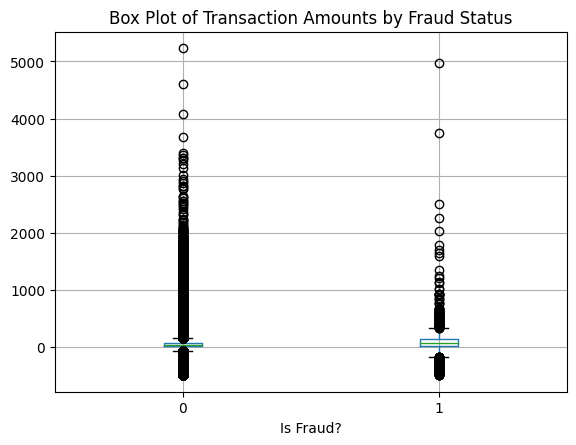

In [ ]:
#Transaction amount by fraud
subset_df['Amount'] = pd.to_numeric(subset_df['Amount'], errors='coerce')
subset_df.boxplot(column='Amount', by='Is Fraud?')
plt.title('Box Plot of Transaction Amounts by Fraud Status')
plt.suptitle('')
plt.show()

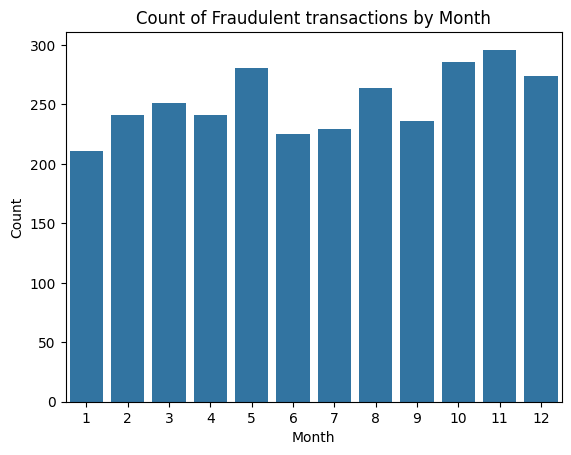

In [ ]:
# The below box plot shows that most of the fraudulent transactions are concentrated to lower amount.
# Count of Fraudulent transactions by Month
fraud_by_month = subset_df[subset_df['Is Fraud?'] == 1].groupby('Month')['Is Fraud?'].count()
sns.barplot(x=fraud_by_month.index, y=fraud_by_month.values)
plt.title('Count of Fraudulent transactions by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

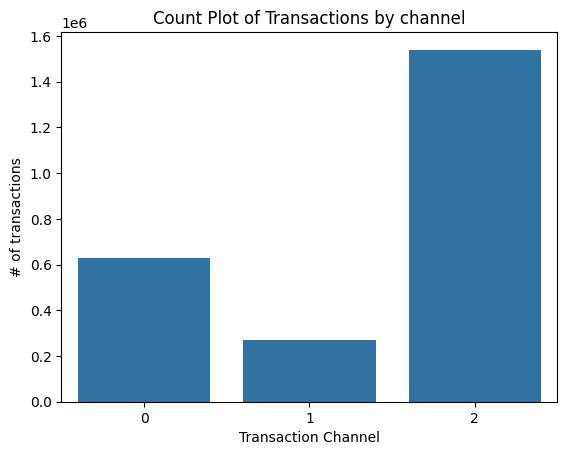

In [ ]:
#plot for chip usage
sns.countplot(x='Use Chip', data=subset_df)
plt.xlabel('Transaction Channel')
plt.ylabel('# of transactions')
plt.title('Count Plot of Transactions by channel')
plt.show()

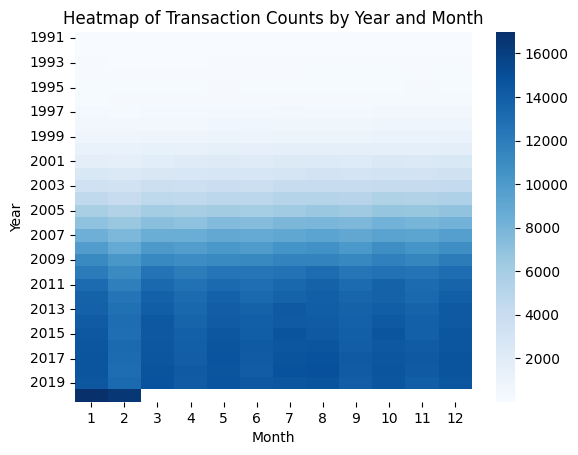

In [ ]:
#Heatmap of transaction counts by year and month
counts = subset_df.groupby(['Year', 'Month']).size().unstack()
sns.heatmap(counts, cmap='Blues')
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Heatmap of Transaction Counts by Year and Month')
plt.show()

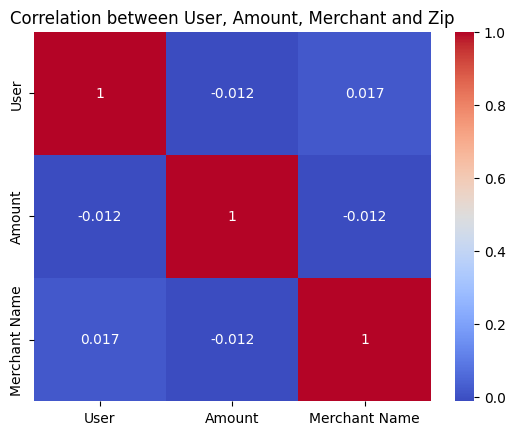

In [ ]:
# Heatmap of correlation between numerical columns
corr = subset_df[['User',  'Amount', 'Merchant Name']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.title('Correlation between User, Amount, Merchant and Zip')
plt.show()

In this code, I split the resampled dataset, containing balanced samples, into training (80%) and testing (20%) sets.

In [ ]:
from sklearn.model_selection import train_test_split

# Defining features (X) and target variable (y)
X = subset_df.drop("Is Fraud?", axis=1)
y = subset_df["Is Fraud?"]

# Spliting the resampled data into training (80%) and testing (20%) sets
X_train_b, X_test, y_train_b, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shapes of the resulting subsets
print("Training set shape:", X_train_b.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1950952, 13)
Testing set shape: (487738, 13)


The resampling process involves applying SMOTE to our feature matrix (X) and target variable (y), resulting in a new DataFrame, 'resampled_df.' This dataset contains a balanced representation of both classes, providing our model with a more comprehensive and unbiased training dataset. This step is critical for the success of our fraud detection efforts.

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_b, y_train_b)

# Create a DataFrame for the resampled train data
train_df = pd.concat([pd.DataFrame(X_train_resampled, columns=X.columns), pd.DataFrame({"Is Fraud?": y_train_resampled})], axis=1)

# Create a DataFrame for the test data
test_df = pd.concat([pd.DataFrame(X_test, columns=X.columns), pd.DataFrame({"Is Fraud?": y_test})], axis=1)

# Concatenate both the resampled train and test data
resampled_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)

# Checking the Fraud distribution after SMOTE
print(resampled_df["Is Fraud?"].value_counts())

# Checking the Fraud distribution after SMOTE
print(y_train_resampled.value_counts())

Is Fraud?
0    2435655
1    1949135
Name: count, dtype: int64
Is Fraud?
0    1948526
1    1948526
Name: count, dtype: int64


In [ ]:
resampled_df.dtypes

,0
User,int64
Card,int64
Year,int64
Month,int64
Day,int64
Amount,float64
Use Chip,int64
Merchant Name,int64
Merchant City,int64
MCC,int64


In [ ]:
resampled_df.shape

(4384790, 14)

I transform the numeric features using the fitted scaler, ensuring that they have a mean of 0 and a standard deviation of 1

In [ ]:
from sklearn.preprocessing import StandardScaler


numeric_features = train_df.columns[:-1]  # Exclude the target column

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to numeric features
scaler.fit(train_df[numeric_features])

# Transforming numeric features using the scaler
train_df[numeric_features] = scaler.transform(train_df[numeric_features])

In [ ]:
# After scaling
print(train_df.head())

       User      Card      Year     Month       Day    Amount  Use Chip  \
0 -1.795774 -0.973287 -1.267148  0.195257  1.928491  0.268980  1.123863   
1  0.972915  2.093925  0.031188  1.455415  0.066710 -0.194034  1.123863   
2 -1.108223 -0.206484  0.896746 -0.119782 -1.050358  1.813082 -1.554158   
3  1.560661 -0.206484  0.896746  1.455415 -1.050358 -0.299546 -1.554158   
4  1.346263 -0.206484  0.463967 -0.749861 -1.298595  0.280397  1.123863   

   Merchant Name  Merchant City       MCC   Errors?     Hours   Minutes  \
0      -0.858539       0.963347  0.161002  0.160545  2.120569  1.836113   
1       0.417587       0.732334  0.455187  0.160545  1.202732  0.692612   
2      -0.341334      -0.883669  2.606412  0.160545  0.514354  0.565556   
3      -0.639042      -0.526525  2.638859  0.160545  2.120569  0.374972   
4      -1.307147       0.713810 -0.099654  0.160545  0.743813  1.518474   

   Is Fraud?  
0          0  
1          0  
2          0  
3          0  
4          0  


In [ ]:
X_train_scaled = scaler.transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)
y_train = y_train_resampled
y_test = y_test

# Checking the first few rows of the scaled training and testing sets
print("Scaled Training Data:")
print(X_train_scaled[:5])

print("Scaled Testing Data:")
print(X_test_scaled[:5])

Scaled Training Data:
[[-1.79577418 -0.97328671 -1.26714788  0.19525735  1.92849077  0.26898046
   1.1238634  -0.85853888  0.9633475   0.16100245  0.16054522  2.12056859
   1.83611328]
 [ 0.97291481  2.09392471  0.03118825  1.45541519  0.06671041 -0.19403363
   1.1238634   0.41758743  0.7323342   0.45518706  0.16054522  1.20273165
   0.69261161]
 [-1.10822258 -0.20648385  0.89674567 -0.11978211 -1.05035781  1.81308209
  -1.55415805 -0.34133383 -0.88366919  2.60641203  0.16054522  0.51435395
   0.56555587]
 [ 1.56066053 -0.20648385  0.89674567  1.45541519 -1.05035781 -0.29954562
  -1.55415805 -0.63904199 -0.52652481  2.63885887  0.16054522  2.12056859
   0.37497225]
 [ 1.34626272 -0.20648385  0.46396696 -0.74986103 -1.29859519  0.28039725
   1.1238634  -1.30714709  0.71380955 -0.09965377  0.16054522  0.74381318
   1.51847392]]
Scaled Testing Data:
[[-1.77174684  0.560319    0.46396696 -0.43482157 -1.67095127 -0.22417991
  -0.21514732 -0.39723358 -0.96703012 -0.65773928  0.16054522 -0.63

In this code, I defined and train a neural network for fraud detection using TensorFlow and Keras.
I started by importing necessary libraries for deep learning and metrics evaluation.
Next, I defined custom metrics functions for recall, precision, and F1-score, which will be used for model evaluation.
Then, I created the neural network architecture using a Sequential model with input, hidden, and output layers.
After defining the architecture, I compile the model using the Adam optimizer and binary cross-entropy loss function.
Notably, I included custom metrics such as accuracy, recall, precision, and F1-score for model evaluation.
Finally, I trained the model on the scaled training with batch size 128.

In [ ]:
#import tensorflow as tf
#from tensorflow import keras
#from keras import backend as K
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
#from keras.callbacks import EarlyStopping, ModelCheckpoint

# Custom metrics for recall, precision, and F1-score
#def recall_m(y_true, y_pred):
#    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))  #error
#    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
#    recall = true_positives / (possible_positives + K.epsilon())
#    return recall

#def precision_m(y_true, y_pred):
#    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
#    precision = true_positives / (predicted_positives + K.epsilon())
#    return precision

#def f1_score_m(y_true, y_pred):
#    precision = precision_m(y_true, y_pred)
#    recall = recall_m(y_true, y_pred)
#    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

# Defining the neural network architecture for structured data
#model = keras.Sequential([
#    keras.layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer with the number of features
#    keras.layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons
#    keras.layers.Dropout(0.2),  # Dropout for regularization
#    keras.layers.BatchNormalization(),  # Batch normalization for faster convergence
#    keras.layers.Dense(32, activation='relu'),  # Another hidden layer with 32 neurons
#    keras.layers.Dropout(0.2),  # Dropout for regularization
#    keras.layers.BatchNormalization(),  # Batch normalization
#    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
#    ])

# Compile the model with optimizer, loss function, and custom metrics
#model.compile(optimizer='adam',
#              loss='binary_crossentropy',
#              metrics=['accuracy', recall_m, precision_m, f1_score_m])

# Callbacks for early stopping and saving the best model
#checkpoint = ModelCheckpoint(filepath="best_model.keras", monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
#early_stop = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1, restore_best_weights=True)

# Train the model on the scaled training data
#train = model.fit(X_train_scaled, y_train,
#                  epochs=100,
#                  batch_size=128,
#                  validation_split=0.2,
#                  callbacks=[early_stop, checkpoint],
#                  verbose=2)

# Evaluate the model on the scaled testing data
#model.evaluate(X_test_scaled, y_test)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Custom metrics for recall, precision, and F1-score using TensorFlow operations
def recall_m(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)  # Convert y_true to float32
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    possible_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true, 0, 1)))
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    return recall

def precision_m(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)  # Convert y_true to float32
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    predicted_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    return precision

def f1_score_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

# Defining the neural network architecture for structured data
model = keras.Sequential([
    keras.layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer with the number of features
    keras.layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons
    keras.layers.Dropout(0.2),  # Dropout for regularization
    keras.layers.BatchNormalization(),  # Batch normalization for faster convergence
    keras.layers.Dense(32, activation='relu'),  # Another hidden layer with 32 neurons
    keras.layers.Dropout(0.2),  # Dropout for regularization
    keras.layers.BatchNormalization(),  # Batch normalization
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with optimizer, loss function, and custom metrics
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', recall_m, precision_m, f1_score_m])

# Callbacks for early stopping and saving the best model
checkpoint = ModelCheckpoint(filepath="best_model.keras", monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1, restore_best_weights=True)

# Train the model on the scaled training data
train = model.fit(X_train_scaled, y_train,
                  epochs=2000,
                  batch_size=128,
                  validation_split=0.2,
                  callbacks=[early_stop, checkpoint],
                  verbose=2)

# Load the best model from the checkpoint after training
best_model = keras.models.load_model('best_model.keras',
                                     custom_objects={'recall_m': recall_m, 'precision_m': precision_m, 'f1_score_m': f1_score_m})

# Evaluate the best model on the scaled testing data
best_model.evaluate(X_test_scaled, y_test)

# Optionally, save the best model to another file if needed
best_model.save('NN_TF_with_Keras_best')

Epoch 1/2000

Epoch 1: val_accuracy improved from -inf to 0.90031, saving model to best_model.keras
24357/24357 - 66s - 3ms/step - accuracy: 0.9179 - f1_score_m: 0.8877 - loss: 0.2147 - precision_m: 0.9071 - recall_m: 0.8717 - val_accuracy: 0.9003 - val_f1_score_m: 0.9473 - val_loss: 0.2204 - val_precision_m: 1.0000 - val_recall_m: 0.9003
Epoch 2/2000

Epoch 2: val_accuracy improved from 0.90031 to 0.92624, saving model to best_model.keras
24357/24357 - 84s - 3ms/step - accuracy: 0.9328 - f1_score_m: 0.9080 - loss: 0.1810 - precision_m: 0.9261 - recall_m: 0.8929 - val_accuracy: 0.9262 - val_f1_score_m: 0.9615 - val_loss: 0.1552 - val_precision_m: 1.0000 - val_recall_m: 0.9262
Epoch 3/2000

Epoch 3: val_accuracy did not improve from 0.92624
24357/24357 - 57s - 2ms/step - accuracy: 0.9345 - f1_score_m: 0.9105 - loss: 0.1763 - precision_m: 0.9280 - recall_m: 0.8958 - val_accuracy: 0.9225 - val_f1_score_m: 0.9595 - val_loss: 0.1656 - val_precision_m: 1.0000 - val_recall_m: 0.9224
Epoch 4/2

In [ ]:
# Load the saved model
#model = load_model('NN_TF_with_Keras.h5')
# Model is now loaded and can be used for further inference or training
#print("Model loaded successfully!")

In [ ]:
# print the confusion matrix and other performance metrics after evaluation
y_pred = model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Confusion matrix and other metrics
conf_matrix = confusion_matrix(y_test, y_pred_classes)
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

15242/15242 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step
Confusion Matrix:
[[471351  15778]
 [   159    450]]
Accuracy: 0.9673246702122861
Precision: 0.02772984964259305
Recall: 0.7389162561576355
F1 Score: 0.05345370315376849


## GNN for fraud detection:
Creating a multigraph for fraud detection using transaction data and applying a Graph Neural Network (GNN) on the edge list can be done in the following steps:

1- Prepare the transaction data: Collect and organize the transaction data into a format that can be used to create the edges of the multigraph. For example, each transaction could be represented as a tuple (node1, node2, attributes), where node1 and node2 represent the sender and receiver of the transaction, and attributes is a dictionary containing properties such as the amount, timestamp, and transaction type.

2- Create the multigraph: Use the transaction data to create a multigraph using the NetworkX library. The add_edge() method can be used to add edges to the multigraph, where each edge represents a transaction.

3- Extract the edges list and their features: Use the edges() method of the multigraph to extract the edges list and their features, which will be used as input to the GNN.

4- Apply a GNN on the edge list: Use a GNN library such as PyTorch Geometric, Deep Graph Library (DGL) or Spektral to apply a GNN on the edge list. The GNN will learn representations of the edges in the multigraph and use them to classify the edges as fraudulent or non-fraudulent.

5- Evaluation: To evaluate the performance of the GNN, you can split the data into train and test sets, and use the test set to evaluate the accuracy, precision, recall, and F1-score of the model.

## Graph construction¶
When constructing a graph with transaction edges between Card and merchant_name, the first step is to identify the nodes in the graph. In this case, the Card and merchant_name represent the nodes in the graph. Each Card represents a unique credit card and each merchant_name represents a unique merchant. These nodes can be created by extracting the Card and merchant_name information from the tabular data and storing them in separate lists.

Once the nodes have been identified, the next step is to create edges between them. These edges represent the transactions that have taken place between a Card and a merchant_name. To create the edges, a list of transactions is created and for each transaction, an edge is created between the Card and merchant_name.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import networkx as nx
import torch
import torch.nn as nn
import torch.nn.functional as F

## Method 1
We are creating an empty multigraph object called G using the nx.MultiGraph() function from the NetworkX library. Then we add nodes to the graph for each unique Card and merchant_name from the dataframe df.

The add_nodes_from method is used to add nodes to the graph, it takes an iterable as input and creates a node for each element in the iterable. The df["Card"].unique() will return a list of unique Cards in the dataframe, and the df["Merchant Name"].unique will return a list of all the merchant names in the dataframe.

The type attribute is added to each node, it is used to differentiate between Card and merchant_name nodes. This will help later on when we want to analyze the graph.

##### Why did we use a multigraph and not graph?

The same user (Card) can buy from the same merchant (Merchant Name) multiple times, so we can have multiple edges between the user and the merchant and for this reason we used multigraph instead of graph

In [ ]:
# Create an empty graph
G = nx.MultiGraph()

# Add nodes to the graph for each unique Card, merchant_name
G.add_nodes_from(df["Card"].unique(), type='Card')
G.add_nodes_from(df["Merchant Name"].unique(), type='merchant_name')

The code below adding edges and properties to the edges of a graph. The code iterates through each row of the dataframe, df, and creates a variable for each property then assign it to the edge between the Card and merchant_name of that row.

In [ ]:
# Add edges and properties to the edges
for _, row in df.iterrows():
    # Create a variable for each properties for each edge

        year = row["Year"],
        month = row["Month"],
        day = row["Day"],
        hour = row["Hour"],
        minute =row["Minute"],
        amount = row["Amount"],
        use_chip =  row["Use Chip"],
        merchant_city = row["Merchant City"],
        errors =  row["Errors?"],
        mcc = row['MCC']


        G.add_edge(row['Card'], row['Merchant Name'], year = year , month = month , day = day ,
              hour = hour , minute = minute , amount = amount , use_chip = use_chip ,
              merchant_city = merchant_city , errors = errors , mcc = mcc)

In [ ]:
# Get the number of nodes and edges in the graph
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Print the number of nodes and edges
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

In [ ]:
# Convert the graph to an adjacency matrix
adj_matrix = nx.adjacency_matrix(G).todense()
adj_matrix.shape

We will retrieve the properties of a small sample of nodes in our graph (G) and print their properties.

In [ ]:
# Get a small sample of the nodes in the graph
sample_nodes = list(G.nodes())[:10]

# Retrieve the properties of the sample nodes
node_properties = nx.get_node_attributes(G, 'type')

# Print the properties of the sample nodes
for node in sample_nodes:
    print(f"Node: {node}, Properties: {node_properties[node]}")

In [ ]:
sample_size = 5
for i, edge in enumerate(G.edges()):
    print(G.get_edge_data(*edge))
    if i >= sample_size - 1:
        break

We will retrieve the properties of a small sample of edges in our graph (G) and print their properties.

In [ ]:
# Retrieve the properties errors of all the edges
edge_properties = nx.get_edge_attributes(G, 'errors')

# Count the number of edges by property value
edge_count_by_property = Counter(edge_properties.values())

# Print the count of edges by property value
for property_value, count in edge_count_by_property.items():
    print(f"Property value: {property_value}, Count: {count}")

In [ ]:
# Prepare the data for input into the model
edge_list = list(G.edges(data=True))
list(edge_list[i][2].values())

We define a PyTorch neural network model called "FraudGNN" which is a type of Graph Neural Network. The model is a simple feedforward neural network with two fully connected (Linear) layers. The first layer has input_dim number of input units and hidden_dim number of output units, while the second layer has hidden_dim number of input units and 1 output unit. The forward function of the model applies the linear layers to the input tensor "x" and applies a ReLU activation function to the output of the first linear layer.

We also prepare data for input into the model. We define the variable "edge_list" which is a list of edges and their associated data in a graph G. Then we create an empty list called "x" and iterates over each edge in the edge_list. For each edge, it extracts the values of the edge data, converts them to floats if needed, and append them to the list "x". Finally, we convert the list "x" to a PyTorch tensor with float datatype, which is ready to be input into the FraudGNN model.

In [ ]:
class FraudGNN(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(FraudGNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x.squeeze(-1)

In [ ]:
# Prepare the data for input into the model
#edge_list = list(G.edges(data=True))
#x = []
#for edge in edge_list:
#    edge_values = list(edge[2].values())
#    edge_values = [float(i[0]) if type(i) == tuple and type(i[0]) == str else i[0] if type(i) == tuple else i for i in edge_values]
#    x.append(edge_values)
#x = torch.tensor(x, dtype=torch.float)
#target = torch.tensor(df['Is Fraud?'].values, dtype=torch.float)
#from sklearn.model_selection import train_test_split
#x_train, x_valid, y_train, y_valid =  train_test_split(x, target, test_size=0.2, stratify=target)
#x_valid, x_test, y_valid, y_test =  train_test_split(x_valid, y_valid, test_size=0.5, stratify=y_valid)

In [ ]:
import torch
from sklearn.model_selection import train_test_split

# Convert X_train_resampled and y_train_resampled to tensors
x_train_resampled = torch.tensor(X_train_resampled, dtype=torch.float)
y_train_resampled = torch.tensor(y_train_resampled.values, dtype=torch.float)

# Convert X_test and y_test to tensors
x_test_tensor = torch.tensor(X_test, dtype=torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float)

# Now let's split the validation set from the resampled training set
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_resampled, y_train_resampled, test_size=0.2, stratify=y_train_resampled
)

In [ ]:
# Define the model
input_dim = len(x[0])
hidden_dim = 16
model = FraudGNN(input_dim, hidden_dim)
num_epochs=2000

# Define the loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
import random

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
#import matplotlib.pyplot as plt

#train_losses = []
#val_losses = []

# Train the model
#for i in range(num_epochs):
    # Forward pass
#    output = model(x_train)
    # Compute the training loss
#    loss = criterion(output, y_train)

    # Compute accuracy for training set
#    predictions = torch.sigmoid(output)
#    predicted_labels = (predictions > 0.5).float()
#    accuracy = torch.mean((predicted_labels == y_train).float())

#    if i % 20 == 0:
#        print(f'Epoch: {i}, Train Loss: {loss.item()}, Train Accuracy: {accuracy.item()}')

        # Validation forward pass
#        val_output = model(x_valid)
#        val_loss = criterion(val_output, y_valid)
#        val_losses.append(val_loss.item())

    # Zero the gradients
#    optimizer.zero_grad()
    # Perform backpropagation
#    loss.backward()
    # Update the parameters
#    optimizer.step()

#    train_losses.append(loss.item())

In [ ]:
import torch
import matplotlib.pyplot as plt
import os

# Define the ModelCheckpoint and EarlyStopping parameters
best_val_accuracy = 0.0
patience_counter = 0
patience = 5  # Number of epochs to wait for improvement before early stopping
best_model_path = "best_model.pt"  # Save the model in PyTorch format

train_losses = []
val_losses = []

# Training loop
for i in range(num_epochs):
    model.train()  # Set the model to training mode

    # Forward pass
    output = model(x_train)
    # Compute the training loss
    loss = criterion(output, y_train)

    # Compute accuracy for training set
    predictions = torch.sigmoid(output)
    predicted_labels = (predictions > 0.5).float()
    accuracy = torch.mean((predicted_labels == y_train).float())

    # Zero the gradients
    optimizer.zero_grad()
    # Perform backpropagation
    loss.backward()
    # Update the parameters
    optimizer.step()

    train_losses.append(loss.item())

    # Validation step
    model.eval()  # Set the model to evaluation mode (no gradients)
    with torch.no_grad():
        val_output = model(x_valid)
        val_loss = criterion(val_output, y_valid)
        val_losses.append(val_loss.item())

        # Calculate validation accuracy
        val_predictions = torch.sigmoid(val_output)
        val_predicted_labels = (val_predictions > 0.5).float()
        val_accuracy = torch.mean((val_predicted_labels == y_valid).float())

        # Print loss and accuracy at regular intervals
        if i % 20 == 0:
            print(f'Epoch: {i}, Train Loss: {loss.item()}, Train Accuracy: {accuracy.item()}, Val Loss: {val_loss.item()}, Val Accuracy: {val_accuracy.item()}')

        # Checkpoint: Save the model if the validation accuracy improves
        if val_accuracy > best_val_accuracy:
            print(f'Validation accuracy improved from {best_val_accuracy:.4f} to {val_accuracy:.4f}. Saving model...')
            best_val_accuracy = val_accuracy
            torch.save(model.state_dict(), best_model_path)  # Save the best model
            patience_counter = 0  # Reset patience counter
        else:
            patience_counter += 1

    # Early stopping: Stop training if the validation loss does not improve for 'patience' epochs
    if patience_counter >= patience:
        print(f'Early stopping after {i+1} epochs. Validation loss did not improve for {patience} epochs.')
        break

# Load the best model
model.load_state_dict(torch.load(best_model_path))

In [ ]:
# save the module
torch.save(model, 'best_full_model.pth')

In [ ]:
# load the module
#model = YourModelClass(*args, **kwargs)
#model.load_state_dict(torch.load('best_model.pt'))


In [ ]:
plt.figure(figsize=(10, 5))
epochs_to_plot = range(0, num_epochs, 20)
plt.plot(epochs_to_plot, train_losses[:len(epochs_to_plot)], label='Train Loss')
plt.plot(epochs_to_plot, val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Time')
plt.legend()
plt.show()

In [ ]:
# Make predictions on the test set
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient computation for inference
    test_output = model(x_test)
    test_predictions = torch.sigmoid(test_output)
    predicted_labels = (test_predictions > 0.5).float()

# Calculate accuracy on the test set
test_accuracy = torch.mean((predicted_labels == y_test).float())
print(f'Test Accuracy: {test_accuracy.item()}')

## Method 2
In this part we will base our work on the paper Inductive Graph Representation Learning for fraud detection written by RafaëlVan Belle, Charles Van Damme, Hendrik Tytgat and JochenDe Weerdt.

Charles has created a python library with the name of inductiveGRL for the experimental setup of their paper.

Library overview :

1- Transaction Data Any dataset that can be transformed into a graph can be used in our experimental setup. For our research, we used a real-life dataset to construct credit card transaction networks containing millions of transactions. This dataset includes information on the following features: anonymized identification of clients and merchants, merchant category code, country, monetary amount, time, acceptance, and fraud label. This real-life dataset is highly imbalanced and contains only 0.65% fraudulent transactions. Note that the demo data in this repository is artificaly generated for demonstration purposes. The Timeframes component derives the different timeframes for a rolling window setup given a step and window size.

2- Graph Construction The GraphConstruction component constructs the graphs that will be used by graph representation learners (e.g. FI-GRL and GraphSAGE) to learn node embeddings. We designed the credit card transaction networks as heterogeneous tripartite graphs containing client, merchant and transaction nodes. Because of this tripartite setup, representations can be learned for the transaction nodes. Only the transaction nodes are configured with node features.

3- GraphSAGE The HinSAGE code deploys a supervised, heterogeneous implementation of the GraphSAGE framework called HinSAGE, to learn embeddings of the transaction nodes in the aforementioned graphs.

4- FI-GRL The FIGRL code learns embeddings of the transaction nodes in the aforementioned graphs using the Fast Inductive Graph Representation Learning Framework. We call the Matlab implementation of FI-GRL from our Jupyter notebooks, which requires an appropriate installation of matlab.engine in the same folder as the notebooks. If you wish to run FI-GRL from Python, please run the following command in Matlab:

cd (fullfile(matlabroot,'extern','engines','python')) system('python setup.py install')

This will generate a folder in matlabroot\extern\engines\python\build\lib called 'matlab' please copy this folder and place it on the same location as the notebook from which you want to call matlab.engine. If you don't know your matlab root, running 'matlabroot' in Matlab will return the appropriate path.

1- Classifier The penultimate component in our pipeline uses the transaction node embeddings to classify the transaction nodes as fraudulent or legitimate. We chose to rely on XGBoost as a classification model, but other classifiers can easily be implemented.

2- Evaluation The Evaluation component contains functions for the Lift score, Lift curve and precision-recall curve. We focused on these evaluation metrics given the highly imbalanced nature of our dataset. However, this code can easily be extended to contain other evaluation metrics such as ROC plots.

In [ ]:
#library installation
!pip install inductiveGRL

In [ ]:
# imports
from inductiveGRL.graphconstruction import GraphConstruction
from inductiveGRL.hinsage import HinSAGE_Representation_Learner

In [ ]:
# Global parameters:
embedding_size = 64
add_additional_data = True

In [ ]:
train_data = train_df
inductive_data = test_df

In [ ]:
print('The distribution of fraud for the train data is:\n', train_data['Is Fraud?'].value_counts())
print('The distribution of fraud for the inductive data is:\n', inductive_data['Is Fraud?'].value_counts())

In [ ]:
transaction_node_data = train_data.drop("Card", axis=1).drop("Merchant Name", axis=1).drop('Is Fraud?', axis=1)
client_node_data = pd.DataFrame([1]*len(train_data["Card"].unique())).set_index(train_data["Card"].unique())
merchant_node_data = pd.DataFrame([1]*len(train_data["Merchant Name"].unique())).set_index(train_data["Merchant Name"].unique())

nodes = {"client":train_data.Card, "merchant":train_data["Merchant Name"], "transaction":train_data.index}
edges = [zip(train_data.Card, train_data.index),zip(train_data["Merchant Name"], train_data.index)]
features = {"transaction": transaction_node_data, 'client': client_node_data, 'merchant': merchant_node_data}

graph = GraphConstruction(nodes, edges, features)
S = graph.get_stellargraph()
print(S.info())

In [ ]:
#GraphSAGE parameters
#num_samples = [2,32]
#embedding_node_type = "transaction"

#hinsage = HinSAGE_Representation_Learner(embedding_size, num_samples, embedding_node_type)
#trained_hinsage_model, train_emb = hinsage.train_hinsage(S, list(train_data.index), train_data['Is Fraud?'], batch_size=5, epochs=10)

In [ ]:
# Define your model checkpoint and early stopping behavior
best_val_accuracy = 0.0
patience_counter = 0
patience = 5  # Number of epochs to wait for improvement before early stopping
best_model_path = "best_model_hinsage.pt"  # Save the model in PyTorch format

train_losses = []
val_losses = []

# Modify your train_hinsage method or incorporate the validation logic in your main loop
for epoch in range(num_epochs):  # Replace with your actual number of epochs
    # Train the model
    trained_hinsage_model, train_emb = hinsage.train_hinsage(S, list(train_data.index), train_data['Is Fraud?'], batch_size=5, epochs=1)

    # Compute training loss and accuracy (assuming train_hinsage returns these, otherwise compute them manually)
    train_loss, train_accuracy = hinsage.evaluate(train_data, train_emb)  # This step might depend on how your model works
    train_losses.append(train_loss)

    # Validation step: evaluate on validation set
    val_emb = hinsage.get_embeddings(S, list(val_data.index))  # Obtain embeddings for the validation set
    val_loss, val_accuracy = hinsage.evaluate(val_data, val_emb)  # Assuming hinsage has an evaluation method for validation data
    val_losses.append(val_loss)

    print(f'Epoch: {epoch}, Train Loss: {train_loss}, Train Accuracy: {train_accuracy}, Val Loss: {val_loss}, Val Accuracy: {val_accuracy}')

    # Checkpoint: Save the model if the validation accuracy improves
    if val_accuracy > best_val_accuracy:
        print(f'Validation accuracy improved from {best_val_accuracy:.4f} to {val_accuracy:.4f}. Saving model...')
        best_val_accuracy = val_accuracy
        torch.save(hinsage.state_dict(), best_model_path)  # Save the best model
        patience_counter = 0  # Reset patience counter
    else:
        patience_counter += 1

    # Early stopping: Stop training if the validation loss does not improve for 'patience' epochs
    if patience_counter >= patience:
        print(f'Early stopping after {epoch+1} epochs. Validation loss did not improve for {patience} epochs.')
        break

# Load the best model (if necessary)
hinsage.load_state_dict(torch.load(best_model_path))

# After training, you can plot the training and validation losses if needed
import matplotlib.pyplot as plt
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
train_emb

In [ ]:
# After training, save the trained model
torch.save(hinsage.state_dict(), "hinsage_trained_model.pt")
print("Model saved successfully!")


In [ ]:
# To load the saved model
#hinsage = HinSAGE_Representation_Learner(embedding_size, num_samples, embedding_node_type)
#hinsage.load_state_dict(torch.load("hinsage_trained_model.pt"))
#hinsage.eval()  # Set the model to evaluation mode
#print("Model loaded successfully!")

Papers

Inductive Graph Representation Learning for fraud detection (paper) : [https://www.sciencedirect.com/science/article/abs/pii/S0957417421017449]

Intelligent Financial Fraud Detection Practices: An Investigation : [https://arxiv.org/ftp/arxiv/papers/1510/1510.07165.pdf]

Modeling Relational Data with Graph Convolutional Networks : [https://arxiv.org/pdf/1703.06103]

For more papers check this github [https://github.com/benedekrozemberczki/awesome-fraud-detection-papers]